# Master PCS - Out of Equilibrium statistical physics
## Homework problem
### __Simulating lattice model of surface groth__
Joseph Touzet

In [11]:
import numpy as np
from matplotlib import pyplot as plt

We first implement the two deposition model: RDR and SOS.

In [22]:
def step_RDR(h):
    L = len(h)
    
    idx = np.random.randint(0, L)
    idx_left  = (idx-1+L)%L
    idx_right = (idx+1  )%L
    
    if   h[idx_left] < h[idx_right]:
        h[idx_left]  += 1
    elif h[idx_left] > h[idx_right]:
        h[idx_right] += 1
    else:
        if np.random.rand() < 0.5:
            h[idx_left]  += 1
        else:
            h[idx_right] += 1
    
    return h

def simulate_RDR(L, t):
    h = np.zeros(L)
    for i in range(int(t)):
        h = step_RDR(h)
    return h

In [31]:
def step_SOS(h):
    L = len(h)
    
    idx = np.random.randint(0, L)
    idx_left  = (idx-1+L)%L
    idx_right = (idx+1  )%L

    h[idx] += 1
    if abs(h[idx_left] - h[idx]) > 1 and abs(h[idx] - h[idx_right]) > 1:
        h[idx] -= 1
    
    return h

def simulate_SOS(L, t):
    h = np.zeros(L)
    for i in range(int(t)):
        h = step_SOS(h)
    return h

We also need to implement a function to compute the roughness:

We first note that $W(L, t)^2 = \left< \overline{(h - \overline{h})^2} \right> = \left< std(h) \right> $

In [14]:
def compute_Wsqr_single(h):
    return np.std(h)

def compute_W(L, t, simulator, n_it):
    Wsqr = 0
    for n in range(int(n_it)):
        h = simulator(L, t)
        Wsqr += compute_Wsqr_single(h)
    Wsqr_avg = Wsqr / n_it
    W = np.sqrt(Wsqr_avg)
    return W

def compute_W_RDR(L, T, n_it):
    return compute_W(L, T, simulate_RDR, n_it)
    
def compute_W_SOS(L, T, n_it):
    return compute_W(L, T, simulate_SOS, n_it)

(1) TODO

In [24]:
L, n_it = 100, 100
ts      = np.round(100*(np.linspace(0.5,10,20))**2)

In [25]:
W_RDR = [compute_W_RDR(L, t, n_it) for t in ts]

In [32]:
W_SOS = [compute_W_SOS(L, t, n_it) for t in ts]

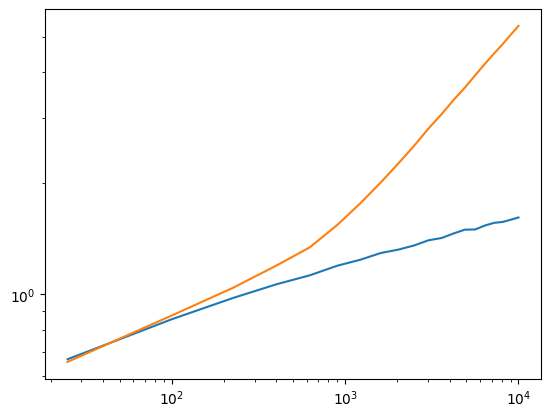

In [42]:
plt.plot(ts, W_RDR)
plt.plot(ts, W_SOS)
plt.xscale("log")
plt.yscale("log")
plt.show()

(2) TODO

(3) TODO

(4) TODO